In [1]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Electric_Production_Time.csv')

In [3]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
df['DATE'] =  pd.to_datetime(df['DATE'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [6]:
df = df.set_index('DATE')

In [7]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<AxesSubplot:xlabel='DATE'>

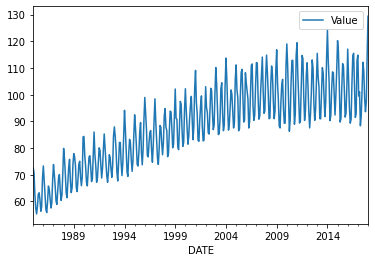

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df)

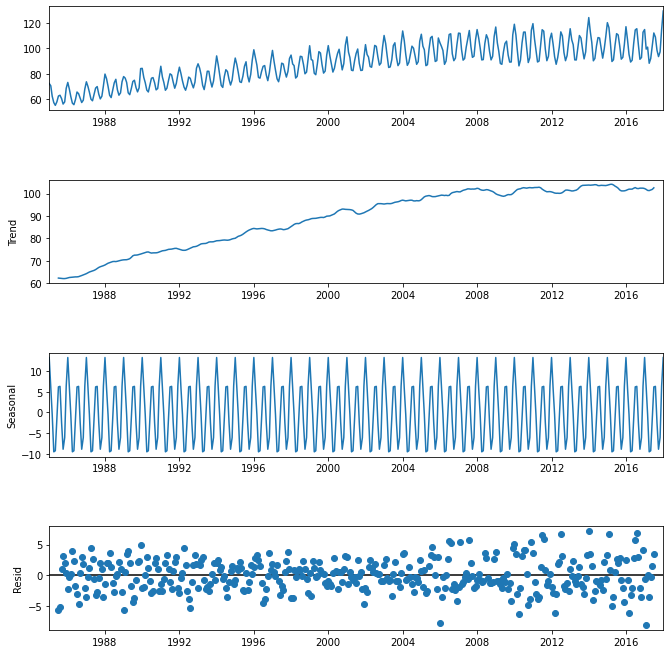

In [10]:
fig = decompose.plot()
fig.set_size_inches(10,10)
plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

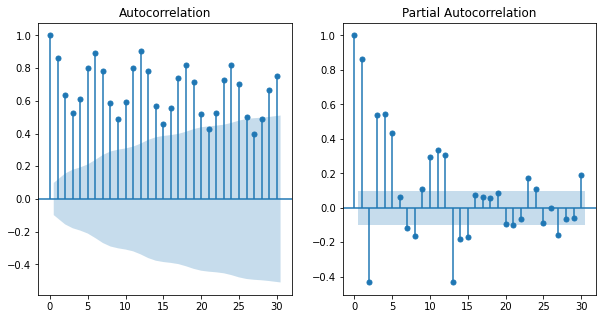

In [12]:
fig, ax = plt.subplots( 1, 2, figsize = (10,5))

plot_acf( df, lags = 30, ax=ax[0] )
plot_pacf( df, lags = 30, ax=ax[1] );

In [13]:
p = d = q = range(0, 3)

In [14]:
P = range(0, 3)
D = range(0, 2)
Q = range(0, 3)
m = range(12, 13)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adf_result = adfuller( df )

In [17]:
adf_result

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [18]:
adf_diff1 = adfuller(df.diff(periods = 1).dropna())

In [19]:
adf_diff1

(-7.104890882267354,
 4.077786565538474e-10,
 14,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.5415092614144)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [21]:
import itertools
import tqdm

In [22]:
pdq = list(itertools.product(p, d, q))
PDQm = list(itertools.product(P, D, Q, m))

In [86]:
aic = []
for i in pdq:
    model = ARIMA(df, order = (i))
    fit_model = model.fit()
    print( f'ARIMA: {i} >> AIC : {round(fit_model.aic, 2)}' )   
    aic.append( round(fit_model.aic, 2) )    

  2%|█▉                                                                                 | 2/84 [00:00<00:05, 14.53it/s]

ARIMA: (0, 0, 0) >> AIC : 3300.1
ARIMA: (0, 0, 1) >> AIC : 2897.34


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [92]:
Saic = []
for i in tqdm.tqdm(pdq):
    for j in PDQm:
        model = sm.tsa.statespace.SARIMAX(df, order = (i), seasonal_order = j, initialization='approximate_diffuse')
        fit_model = model.fit()
        print( f'SARIMA: {i} {j}>> AIC : {round(fit_model.aic, 2)}' )   
        Saic.append( round(fit_model.aic, 2) )    

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

SARIMA: (0, 0, 0) (0, 0, 0, 12)>> AIC : 4707.13
SARIMA: (0, 0, 0) (0, 0, 1, 12)>> AIC : 4284.52
SARIMA: (0, 0, 0) (0, 0, 2, 12)>> AIC : 4068.23
SARIMA: (0, 0, 0) (0, 1, 0, 12)>> AIC : 2281.33
SARIMA: (0, 0, 0) (0, 1, 1, 12)>> AIC : 2297.4
SARIMA: (0, 0, 0) (0, 1, 2, 12)>> AIC : 2431.26
SARIMA: (0, 0, 0) (1, 0, 0, 12)>> AIC : 2282.65
SARIMA: (0, 0, 0) (1, 0, 1, 12)>> AIC : 2291.11
SARIMA: (0, 0, 0) (1, 0, 2, 12)>> AIC : 2424.97
SARIMA: (0, 0, 0) (1, 1, 0, 12)>> AIC : 2290.93
SARIMA: (0, 0, 0) (1, 1, 1, 12)>> AIC : 2299.4
SARIMA: (0, 0, 0) (1, 1, 2, 12)>> AIC : 2318.25
SARIMA: (0, 0, 0) (2, 0, 0, 12)>> AIC : 2412.59
SARIMA: (0, 0, 0) (2, 0, 1, 12)>> AIC : 2413.82
SARIMA: (0, 0, 0) (2, 0, 2, 12)>> AIC : 2450.14
SARIMA: (0, 0, 0) (2, 1, 0, 12)>> AIC : 2420.88
SARIMA: (0, 0, 0) (2, 1, 1, 12)>> AIC : 2390.19


  4%|███                                                                                | 1/27 [00:46<20:03, 46.30s/it]

SARIMA: (0, 0, 0) (2, 1, 2, 12)>> AIC : 2320.25
SARIMA: (0, 0, 1) (0, 0, 0, 12)>> AIC : 4196.8
SARIMA: (0, 0, 1) (0, 0, 1, 12)>> AIC : 3811.36
SARIMA: (0, 0, 1) (0, 0, 2, 12)>> AIC : 3589.07
SARIMA: (0, 0, 1) (0, 1, 0, 12)>> AIC : 2149.9
SARIMA: (0, 0, 1) (0, 1, 1, 12)>> AIC : 2156.82
SARIMA: (0, 0, 1) (0, 1, 2, 12)>> AIC : 2294.8
SARIMA: (0, 0, 1) (1, 0, 0, 12)>> AIC : 2150.52
SARIMA: (0, 0, 1) (1, 0, 1, 12)>> AIC : 2150.53
SARIMA: (0, 0, 1) (1, 0, 2, 12)>> AIC : 2288.52
SARIMA: (0, 0, 1) (1, 1, 0, 12)>> AIC : 2158.81
SARIMA: (0, 0, 1) (1, 1, 1, 12)>> AIC : 2158.82
SARIMA: (0, 0, 1) (1, 1, 2, 12)>> AIC : 2213.31
SARIMA: (0, 0, 1) (2, 0, 0, 12)>> AIC : 2427.94
SARIMA: (0, 0, 1) (2, 0, 1, 12)>> AIC : 2270.41
SARIMA: (0, 0, 1) (2, 0, 2, 12)>> AIC : 2312.73
SARIMA: (0, 0, 1) (2, 1, 0, 12)>> AIC : 2277.07
SARIMA: (0, 0, 1) (2, 1, 1, 12)>> AIC : 2274.18


  7%|██████▏                                                                            | 2/27 [01:45<22:27, 53.92s/it]

SARIMA: (0, 0, 1) (2, 1, 2, 12)>> AIC : 2215.32
SARIMA: (0, 0, 2) (0, 0, 0, 12)>> AIC : 3880.08
SARIMA: (0, 0, 2) (0, 0, 1, 12)>> AIC : 4067.58
SARIMA: (0, 0, 2) (0, 0, 2, 12)>> AIC : 3519.24
SARIMA: (0, 0, 2) (0, 1, 0, 12)>> AIC : 2143.14
SARIMA: (0, 0, 2) (0, 1, 1, 12)>> AIC : 2149.81
SARIMA: (0, 0, 2) (0, 1, 2, 12)>> AIC : 2287.16
SARIMA: (0, 0, 2) (1, 0, 0, 12)>> AIC : 2143.65
SARIMA: (0, 0, 2) (1, 0, 1, 12)>> AIC : 2143.55
SARIMA: (0, 0, 2) (1, 0, 2, 12)>> AIC : 2301.59
SARIMA: (0, 0, 2) (1, 1, 0, 12)>> AIC : 2151.35
SARIMA: (0, 0, 2) (1, 1, 1, 12)>> AIC : 2151.81
SARIMA: (0, 0, 2) (1, 1, 2, 12)>> AIC : 2215.99
SARIMA: (0, 0, 2) (2, 0, 0, 12)>> AIC : 2401.87
SARIMA: (0, 0, 2) (2, 0, 1, 12)>> AIC : 2277.46
SARIMA: (0, 0, 2) (2, 0, 2, 12)>> AIC : 2313.61
SARIMA: (0, 0, 2) (2, 1, 0, 12)>> AIC : 2264.06
SARIMA: (0, 0, 2) (2, 1, 1, 12)>> AIC : 2255.77


 11%|█████████▏                                                                         | 3/27 [03:04<26:06, 65.28s/it]

SARIMA: (0, 0, 2) (2, 1, 2, 12)>> AIC : 2237.34
SARIMA: (0, 1, 0) (0, 0, 0, 12)>> AIC : 2764.53
SARIMA: (0, 1, 0) (0, 0, 1, 12)>> AIC : 2589.13
SARIMA: (0, 1, 0) (0, 0, 2, 12)>> AIC : 2601.33
SARIMA: (0, 1, 0) (0, 1, 0, 12)>> AIC : 2214.35
SARIMA: (0, 1, 0) (0, 1, 1, 12)>> AIC : 2074.89
SARIMA: (0, 1, 0) (0, 1, 2, 12)>> AIC : 2212.17
SARIMA: (0, 1, 0) (1, 0, 0, 12)>> AIC : 2204.96
SARIMA: (0, 1, 0) (1, 0, 1, 12)>> AIC : 2068.75
SARIMA: (0, 1, 0) (1, 0, 2, 12)>> AIC : 2206.03
SARIMA: (0, 1, 0) (1, 1, 0, 12)>> AIC : 2264.09
SARIMA: (0, 1, 0) (1, 1, 1, 12)>> AIC : 2076.89
SARIMA: (0, 1, 0) (1, 1, 2, 12)>> AIC : 2210.4
SARIMA: (0, 1, 0) (2, 0, 0, 12)>> AIC : 2289.35
SARIMA: (0, 1, 0) (2, 0, 1, 12)>> AIC : 2195.18
SARIMA: (0, 1, 0) (2, 0, 2, 12)>> AIC : 2307.56
SARIMA: (0, 1, 0) (2, 1, 0, 12)>> AIC : 2343.8
SARIMA: (0, 1, 0) (2, 1, 1, 12)>> AIC : 2203.31


 15%|████████████▎                                                                      | 4/27 [03:46<21:30, 56.10s/it]

SARIMA: (0, 1, 0) (2, 1, 2, 12)>> AIC : 2212.4
SARIMA: (0, 1, 1) (0, 0, 0, 12)>> AIC : 2648.87
SARIMA: (0, 1, 1) (0, 0, 1, 12)>> AIC : 2549.36
SARIMA: (0, 1, 1) (0, 0, 2, 12)>> AIC : 2599.75
SARIMA: (0, 1, 1) (0, 1, 0, 12)>> AIC : 2177.3
SARIMA: (0, 1, 1) (0, 1, 1, 12)>> AIC : 2059.48
SARIMA: (0, 1, 1) (0, 1, 2, 12)>> AIC : 2197.95
SARIMA: (0, 1, 1) (1, 0, 0, 12)>> AIC : 2171.82
SARIMA: (0, 1, 1) (1, 0, 1, 12)>> AIC : 2053.35
SARIMA: (0, 1, 1) (1, 0, 2, 12)>> AIC : 2191.81
SARIMA: (0, 1, 1) (1, 1, 0, 12)>> AIC : 2232.41
SARIMA: (0, 1, 1) (1, 1, 1, 12)>> AIC : 2061.48
SARIMA: (0, 1, 1) (1, 1, 2, 12)>> AIC : 2196.12
SARIMA: (0, 1, 1) (2, 0, 0, 12)>> AIC : 2261.27
SARIMA: (0, 1, 1) (2, 0, 1, 12)>> AIC : 2169.81
SARIMA: (0, 1, 1) (2, 0, 2, 12)>> AIC : 2317.25
SARIMA: (0, 1, 1) (2, 1, 0, 12)>> AIC : 2319.21
SARIMA: (0, 1, 1) (2, 1, 1, 12)>> AIC : 2177.94


 19%|███████████████▎                                                                   | 5/27 [04:48<21:23, 58.36s/it]

SARIMA: (0, 1, 1) (2, 1, 2, 12)>> AIC : 2198.13
SARIMA: (0, 1, 2) (0, 0, 0, 12)>> AIC : 2573.03
SARIMA: (0, 1, 2) (0, 0, 1, 12)>> AIC : 2457.23
SARIMA: (0, 1, 2) (0, 0, 2, 12)>> AIC : 2492.83
SARIMA: (0, 1, 2) (0, 1, 0, 12)>> AIC : 2135.25
SARIMA: (0, 1, 2) (0, 1, 1, 12)>> AIC : 2025.94
SARIMA: (0, 1, 2) (0, 1, 2, 12)>> AIC : 2167.99
SARIMA: (0, 1, 2) (1, 0, 0, 12)>> AIC : 2120.63
SARIMA: (0, 1, 2) (1, 0, 1, 12)>> AIC : 2019.8
SARIMA: (0, 1, 2) (1, 0, 2, 12)>> AIC : 2161.85
SARIMA: (0, 1, 2) (1, 1, 0, 12)>> AIC : 2190.4
SARIMA: (0, 1, 2) (1, 1, 1, 12)>> AIC : 2027.94
SARIMA: (0, 1, 2) (1, 1, 2, 12)>> AIC : 2164.52
SARIMA: (0, 1, 2) (2, 0, 0, 12)>> AIC : 2213.14
SARIMA: (0, 1, 2) (2, 0, 1, 12)>> AIC : 2127.54
SARIMA: (0, 1, 2) (2, 0, 2, 12)>> AIC : 2249.87
SARIMA: (0, 1, 2) (2, 1, 0, 12)>> AIC : 2275.09
SARIMA: (0, 1, 2) (2, 1, 1, 12)>> AIC : 2135.56


 22%|██████████████████▍                                                                | 6/27 [06:11<23:16, 66.50s/it]

SARIMA: (0, 1, 2) (2, 1, 2, 12)>> AIC : 2166.55
SARIMA: (0, 2, 0) (0, 0, 0, 12)>> AIC : 2859.69
SARIMA: (0, 2, 0) (0, 0, 1, 12)>> AIC : 2738.06
SARIMA: (0, 2, 0) (0, 0, 2, 12)>> AIC : 2797.48
SARIMA: (0, 2, 0) (0, 1, 0, 12)>> AIC : 2557.3
SARIMA: (0, 2, 0) (0, 1, 1, 12)>> AIC : 2413.2
SARIMA: (0, 2, 0) (0, 1, 2, 12)>> AIC : 2528.63
SARIMA: (0, 2, 0) (1, 0, 0, 12)>> AIC : 2530.89
SARIMA: (0, 2, 0) (1, 0, 1, 12)>> AIC : 2407.07
SARIMA: (0, 2, 0) (1, 0, 2, 12)>> AIC : 2522.67
SARIMA: (0, 2, 0) (1, 1, 0, 12)>> AIC : 2594.67
SARIMA: (0, 2, 0) (1, 1, 1, 12)>> AIC : 2415.2
SARIMA: (0, 2, 0) (1, 1, 2, 12)>> AIC : 2530.62
SARIMA: (0, 2, 0) (2, 0, 0, 12)>> AIC : 2613.53
SARIMA: (0, 2, 0) (2, 0, 1, 12)>> AIC : 2514.01
SARIMA: (0, 2, 0) (2, 0, 2, 12)>> AIC : 2527.18
SARIMA: (0, 2, 0) (2, 1, 0, 12)>> AIC : 2659.59
SARIMA: (0, 2, 0) (2, 1, 1, 12)>> AIC : 2521.96


 26%|█████████████████████▌                                                             | 7/27 [06:54<19:38, 58.90s/it]

SARIMA: (0, 2, 0) (2, 1, 2, 12)>> AIC : 2535.87
SARIMA: (0, 2, 1) (0, 0, 0, 12)>> AIC : 2846.93
SARIMA: (0, 2, 1) (0, 0, 1, 12)>> AIC : 2607.3
SARIMA: (0, 2, 1) (0, 0, 2, 12)>> AIC : 2619.11
SARIMA: (0, 2, 1) (0, 1, 0, 12)>> AIC : 2234.38
SARIMA: (0, 2, 1) (0, 1, 1, 12)>> AIC : 2098.46
SARIMA: (0, 2, 1) (0, 1, 2, 12)>> AIC : 2235.76
SARIMA: (0, 2, 1) (1, 0, 0, 12)>> AIC : 2224.14
SARIMA: (0, 2, 1) (1, 0, 1, 12)>> AIC : 2092.5
SARIMA: (0, 2, 1) (1, 0, 2, 12)>> AIC : 2229.79
SARIMA: (0, 2, 1) (1, 1, 0, 12)>> AIC : 2243.3
SARIMA: (0, 2, 1) (1, 1, 1, 12)>> AIC : 2100.46
SARIMA: (0, 2, 1) (1, 1, 2, 12)>> AIC : 2233.3
SARIMA: (0, 2, 1) (2, 0, 0, 12)>> AIC : 2306.8
SARIMA: (0, 2, 1) (2, 0, 1, 12)>> AIC : 2207.26
SARIMA: (0, 2, 1) (2, 0, 2, 12)>> AIC : 2226.31
SARIMA: (0, 2, 1) (2, 1, 0, 12)>> AIC : 2360.9
SARIMA: (0, 2, 1) (2, 1, 1, 12)>> AIC : 2215.66


 30%|████████████████████████▌                                                          | 8/27 [08:22<21:35, 68.17s/it]

SARIMA: (0, 2, 1) (2, 1, 2, 12)>> AIC : 2235.45
SARIMA: (0, 2, 2) (0, 0, 0, 12)>> AIC : 2666.8
SARIMA: (0, 2, 2) (0, 0, 1, 12)>> AIC : 2567.03
SARIMA: (0, 2, 2) (0, 0, 2, 12)>> AIC : 2617.17
SARIMA: (0, 2, 2) (0, 1, 0, 12)>> AIC : 2198.61
SARIMA: (0, 2, 2) (0, 1, 1, 12)>> AIC : 2083.99
SARIMA: (0, 2, 2) (0, 1, 2, 12)>> AIC : 2222.49
SARIMA: (0, 2, 2) (1, 0, 0, 12)>> AIC : 2192.31
SARIMA: (0, 2, 2) (1, 0, 1, 12)>> AIC : 2078.03
SARIMA: (0, 2, 2) (1, 0, 2, 12)>> AIC : 2216.53
SARIMA: (0, 2, 2) (1, 1, 0, 12)>> AIC : 2206.85
SARIMA: (0, 2, 2) (1, 1, 1, 12)>> AIC : 2085.99
SARIMA: (0, 2, 2) (1, 1, 2, 12)>> AIC : 2220.03
SARIMA: (0, 2, 2) (2, 0, 0, 12)>> AIC : 2280.65
SARIMA: (0, 2, 2) (2, 0, 1, 12)>> AIC : 2182.63
SARIMA: (0, 2, 2) (2, 0, 2, 12)>> AIC : 2213.15
SARIMA: (0, 2, 2) (2, 1, 0, 12)>> AIC : 2289.76
SARIMA: (0, 2, 2) (2, 1, 1, 12)>> AIC : 2197.67


 33%|███████████████████████████▋                                                       | 9/27 [10:17<24:50, 82.81s/it]

SARIMA: (0, 2, 2) (2, 1, 2, 12)>> AIC : 2223.02
SARIMA: (1, 0, 0) (0, 0, 0, 12)>> AIC : 2765.65
SARIMA: (1, 0, 0) (0, 0, 1, 12)>> AIC : 2590.13
SARIMA: (1, 0, 0) (0, 0, 2, 12)>> AIC : 2602.32
SARIMA: (1, 0, 0) (0, 1, 0, 12)>> AIC : 2123.75
SARIMA: (1, 0, 0) (0, 1, 1, 12)>> AIC : 2057.83
SARIMA: (1, 0, 0) (0, 1, 2, 12)>> AIC : 2195.52
SARIMA: (1, 0, 0) (1, 0, 0, 12)>> AIC : 2135.88
SARIMA: (1, 0, 0) (1, 0, 1, 12)>> AIC : 2049.03
SARIMA: (1, 0, 0) (1, 0, 2, 12)>> AIC : 2186.68
SARIMA: (1, 0, 0) (1, 1, 0, 12)>> AIC : 2145.34
SARIMA: (1, 0, 0) (1, 1, 1, 12)>> AIC : 2059.83
SARIMA: (1, 0, 0) (1, 1, 2, 12)>> AIC : 2195.22
SARIMA: (1, 0, 0) (2, 0, 0, 12)>> AIC : 2233.54
SARIMA: (1, 0, 0) (2, 0, 1, 12)>> AIC : 2187.04
SARIMA: (1, 0, 0) (2, 0, 2, 12)>> AIC : 2185.62
SARIMA: (1, 0, 0) (2, 1, 0, 12)>> AIC : 2243.79
SARIMA: (1, 0, 0) (2, 1, 1, 12)>> AIC : 2197.86


 37%|██████████████████████████████▎                                                   | 10/27 [11:17<21:28, 75.80s/it]

SARIMA: (1, 0, 0) (2, 1, 2, 12)>> AIC : 2197.24
SARIMA: (1, 0, 1) (0, 0, 0, 12)>> AIC : 2649.49
SARIMA: (1, 0, 1) (0, 0, 1, 12)>> AIC : 2549.96
SARIMA: (1, 0, 1) (0, 0, 2, 12)>> AIC : 2600.24
SARIMA: (1, 0, 1) (0, 1, 0, 12)>> AIC : 2126.67
SARIMA: (1, 0, 1) (0, 1, 1, 12)>> AIC : 2056.03
SARIMA: (1, 0, 1) (0, 1, 2, 12)>> AIC : 2193.76
SARIMA: (1, 0, 1) (1, 0, 0, 12)>> AIC : 2137.58
SARIMA: (1, 0, 1) (1, 0, 1, 12)>> AIC : 2046.66
SARIMA: (1, 0, 1) (1, 0, 2, 12)>> AIC : 2184.42
SARIMA: (1, 0, 1) (1, 1, 0, 12)>> AIC : 2147.21
SARIMA: (1, 0, 1) (1, 1, 1, 12)>> AIC : 2058.03
SARIMA: (1, 0, 1) (1, 1, 2, 12)>> AIC : 2193.02
SARIMA: (1, 0, 1) (2, 0, 0, 12)>> AIC : 2233.67
SARIMA: (1, 0, 1) (2, 0, 1, 12)>> AIC : 2173.71
SARIMA: (1, 0, 1) (2, 0, 2, 12)>> AIC : 2183.04
SARIMA: (1, 0, 1) (2, 1, 0, 12)>> AIC : 2244.56
SARIMA: (1, 0, 1) (2, 1, 1, 12)>> AIC : 2185.08


 41%|█████████████████████████████████▍                                                | 11/27 [12:27<19:43, 73.94s/it]

SARIMA: (1, 0, 1) (2, 1, 2, 12)>> AIC : 2195.53
SARIMA: (1, 0, 2) (0, 0, 0, 12)>> AIC : 2574.34
SARIMA: (1, 0, 2) (0, 0, 1, 12)>> AIC : 2458.54
SARIMA: (1, 0, 2) (0, 0, 2, 12)>> AIC : 2494.14
SARIMA: (1, 0, 2) (0, 1, 0, 12)>> AIC : 2125.02
SARIMA: (1, 0, 2) (0, 1, 1, 12)>> AIC : 2027.3
SARIMA: (1, 0, 2) (0, 1, 2, 12)>> AIC : 2168.43
SARIMA: (1, 0, 2) (1, 0, 0, 12)>> AIC : 2122.77
SARIMA: (1, 0, 2) (1, 0, 1, 12)>> AIC : 2017.63
SARIMA: (1, 0, 2) (1, 0, 2, 12)>> AIC : 2158.77
SARIMA: (1, 0, 2) (1, 1, 0, 12)>> AIC : 2140.41
SARIMA: (1, 0, 2) (1, 1, 1, 12)>> AIC : 2029.3
SARIMA: (1, 0, 2) (1, 1, 2, 12)>> AIC : 2165.1
SARIMA: (1, 0, 2) (2, 0, 0, 12)>> AIC : 2215.64
SARIMA: (1, 0, 2) (2, 0, 1, 12)>> AIC : 2135.97
SARIMA: (1, 0, 2) (2, 0, 2, 12)>> AIC : 2154.76
SARIMA: (1, 0, 2) (2, 1, 0, 12)>> AIC : 2234.26
SARIMA: (1, 0, 2) (2, 1, 1, 12)>> AIC : 2147.63


 44%|████████████████████████████████████▍                                             | 12/27 [14:12<20:53, 83.55s/it]

SARIMA: (1, 0, 2) (2, 1, 2, 12)>> AIC : 2167.16
SARIMA: (1, 1, 0) (0, 0, 0, 12)>> AIC : 2713.2
SARIMA: (1, 1, 0) (0, 0, 1, 12)>> AIC : 2566.77
SARIMA: (1, 1, 0) (0, 0, 2, 12)>> AIC : 2598.8
SARIMA: (1, 1, 0) (0, 1, 0, 12)>> AIC : 2198.61
SARIMA: (1, 1, 0) (0, 1, 1, 12)>> AIC : 2069.32
SARIMA: (1, 1, 0) (0, 1, 2, 12)>> AIC : 2201.22
SARIMA: (1, 1, 0) (1, 0, 0, 12)>> AIC : 2199.36
SARIMA: (1, 1, 0) (1, 0, 1, 12)>> AIC : 2062.9
SARIMA: (1, 1, 0) (1, 0, 2, 12)>> AIC : 2194.99
SARIMA: (1, 1, 0) (1, 1, 0, 12)>> AIC : 2253.57
SARIMA: (1, 1, 0) (1, 1, 1, 12)>> AIC : 2071.32
SARIMA: (1, 1, 0) (1, 1, 2, 12)>> AIC : 2203.16
SARIMA: (1, 1, 0) (2, 0, 0, 12)>> AIC : 2285.37
SARIMA: (1, 1, 0) (2, 0, 1, 12)>> AIC : 2195.64
SARIMA: (1, 1, 0) (2, 0, 2, 12)>> AIC : 2308.69
SARIMA: (1, 1, 0) (2, 1, 0, 12)>> AIC : 2336.49
SARIMA: (1, 1, 0) (2, 1, 1, 12)>> AIC : 2203.87


 48%|███████████████████████████████████████▍                                          | 13/27 [15:14<17:59, 77.09s/it]

SARIMA: (1, 1, 0) (2, 1, 2, 12)>> AIC : 2205.15
SARIMA: (1, 1, 1) (0, 0, 0, 12)>> AIC : 2649.84
SARIMA: (1, 1, 1) (0, 0, 1, 12)>> AIC : 2550.89
SARIMA: (1, 1, 1) (0, 0, 2, 12)>> AIC : 2536.59
SARIMA: (1, 1, 1) (0, 1, 0, 12)>> AIC : 2126.87
SARIMA: (1, 1, 1) (0, 1, 1, 12)>> AIC : 2012.37
SARIMA: (1, 1, 1) (0, 1, 2, 12)>> AIC : 2152.76
SARIMA: (1, 1, 1) (1, 0, 0, 12)>> AIC : 2126.81
SARIMA: (1, 1, 1) (1, 0, 1, 12)>> AIC : 2005.45
SARIMA: (1, 1, 1) (1, 0, 2, 12)>> AIC : 2145.83
SARIMA: (1, 1, 1) (1, 1, 0, 12)>> AIC : 2186.22
SARIMA: (1, 1, 1) (1, 1, 1, 12)>> AIC : 2014.37
SARIMA: (1, 1, 1) (1, 1, 2, 12)>> AIC : 2149.87
SARIMA: (1, 1, 1) (2, 0, 0, 12)>> AIC : 2218.7
SARIMA: (1, 1, 1) (2, 0, 1, 12)>> AIC : 2134.63
SARIMA: (1, 1, 1) (2, 0, 2, 12)>> AIC : 2317.52
SARIMA: (1, 1, 1) (2, 1, 0, 12)>> AIC : 2271.28
SARIMA: (1, 1, 1) (2, 1, 1, 12)>> AIC : 2143.55


 52%|██████████████████████████████████████████▌                                       | 14/27 [16:41<17:19, 79.95s/it]

SARIMA: (1, 1, 1) (2, 1, 2, 12)>> AIC : 2151.87
SARIMA: (1, 1, 2) (0, 0, 0, 12)>> AIC : 2540.14
SARIMA: (1, 1, 2) (0, 0, 1, 12)>> AIC : 2440.76
SARIMA: (1, 1, 2) (0, 0, 2, 12)>> AIC : 2486.82
SARIMA: (1, 1, 2) (0, 1, 0, 12)>> AIC : 2128.85
SARIMA: (1, 1, 2) (0, 1, 1, 12)>> AIC : 2020.66
SARIMA: (1, 1, 2) (0, 1, 2, 12)>> AIC : 2163.46
SARIMA: (1, 1, 2) (1, 0, 0, 12)>> AIC : 2124.94
SARIMA: (1, 1, 2) (1, 0, 1, 12)>> AIC : 2014.2
SARIMA: (1, 1, 2) (1, 0, 2, 12)>> AIC : 2157.01
SARIMA: (1, 1, 2) (1, 1, 0, 12)>> AIC : 2187.32
SARIMA: (1, 1, 2) (1, 1, 1, 12)>> AIC : 2022.66
SARIMA: (1, 1, 2) (1, 1, 2, 12)>> AIC : 2160.05
SARIMA: (1, 1, 2) (2, 0, 0, 12)>> AIC : 2216.55
SARIMA: (1, 1, 2) (2, 0, 1, 12)>> AIC : 2135.8
SARIMA: (1, 1, 2) (2, 0, 2, 12)>> AIC : 2243.35
SARIMA: (1, 1, 2) (2, 1, 0, 12)>> AIC : 2271.07
SARIMA: (1, 1, 2) (2, 1, 1, 12)>> AIC : 2142.22


 56%|█████████████████████████████████████████████▌                                    | 15/27 [18:23<17:20, 86.71s/it]

SARIMA: (1, 1, 2) (2, 1, 2, 12)>> AIC : 2162.12
SARIMA: (1, 2, 0) (0, 0, 0, 12)>> AIC : 2854.54
SARIMA: (1, 2, 0) (0, 0, 1, 12)>> AIC : 2739.08
SARIMA: (1, 2, 0) (0, 0, 2, 12)>> AIC : 2788.31
SARIMA: (1, 2, 0) (0, 1, 0, 12)>> AIC : 2461.4
SARIMA: (1, 2, 0) (0, 1, 1, 12)>> AIC : 2316.18
SARIMA: (1, 2, 0) (0, 1, 2, 12)>> AIC : 2432.19
SARIMA: (1, 2, 0) (1, 0, 0, 12)>> AIC : 2455.26
SARIMA: (1, 2, 0) (1, 0, 1, 12)>> AIC : 2309.11
SARIMA: (1, 2, 0) (1, 0, 2, 12)>> AIC : 2425.55
SARIMA: (1, 2, 0) (1, 1, 0, 12)>> AIC : 2502.35
SARIMA: (1, 2, 0) (1, 1, 1, 12)>> AIC : 2318.18
SARIMA: (1, 2, 0) (1, 1, 2, 12)>> AIC : 2434.19
SARIMA: (1, 2, 0) (2, 0, 0, 12)>> AIC : 2530.74
SARIMA: (1, 2, 0) (2, 0, 1, 12)>> AIC : 2425.69
SARIMA: (1, 2, 0) (2, 0, 2, 12)>> AIC : 2427.55
SARIMA: (1, 2, 0) (2, 1, 0, 12)>> AIC : 2570.9
SARIMA: (1, 2, 0) (2, 1, 1, 12)>> AIC : 2434.33


 59%|████████████████████████████████████████████████▌                                 | 16/27 [19:26<14:34, 79.51s/it]

SARIMA: (1, 2, 0) (2, 1, 2, 12)>> AIC : 2436.18
SARIMA: (1, 2, 1) (0, 0, 0, 12)>> AIC : 2731.71
SARIMA: (1, 2, 1) (0, 0, 1, 12)>> AIC : 2585.16
SARIMA: (1, 2, 1) (0, 0, 2, 12)>> AIC : 2616.7
SARIMA: (1, 2, 1) (0, 1, 0, 12)>> AIC : 2219.07
SARIMA: (1, 2, 1) (0, 1, 1, 12)>> AIC : 2092.64
SARIMA: (1, 2, 1) (0, 1, 2, 12)>> AIC : 2224.7
SARIMA: (1, 2, 1) (1, 0, 0, 12)>> AIC : 2215.24
SARIMA: (1, 2, 1) (1, 0, 1, 12)>> AIC : 2086.42
SARIMA: (1, 2, 1) (1, 0, 2, 12)>> AIC : 2218.62
SARIMA: (1, 2, 1) (1, 1, 0, 12)>> AIC : 2270.84
SARIMA: (1, 2, 1) (1, 1, 1, 12)>> AIC : 2094.79
SARIMA: (1, 2, 1) (1, 1, 2, 12)>> AIC : 2226.6
SARIMA: (1, 2, 1) (2, 0, 0, 12)>> AIC : 2299.58
SARIMA: (1, 2, 1) (2, 0, 1, 12)>> AIC : 2207.62
SARIMA: (1, 2, 1) (2, 0, 2, 12)>> AIC : 2446.0
SARIMA: (1, 2, 1) (2, 1, 0, 12)>> AIC : 2310.12
SARIMA: (1, 2, 1) (2, 1, 1, 12)>> AIC : 2225.5


 63%|███████████████████████████████████████████████████▋                              | 17/27 [21:18<14:53, 89.34s/it]

SARIMA: (1, 2, 1) (2, 1, 2, 12)>> AIC : 2229.43
SARIMA: (1, 2, 2) (0, 0, 0, 12)>> AIC : 2667.87
SARIMA: (1, 2, 2) (0, 0, 1, 12)>> AIC : 2568.46
SARIMA: (1, 2, 2) (0, 0, 2, 12)>> AIC : 2609.98
SARIMA: (1, 2, 2) (0, 1, 0, 12)>> AIC : 2151.65
SARIMA: (1, 2, 2) (0, 1, 1, 12)>> AIC : 2038.57
SARIMA: (1, 2, 2) (0, 1, 2, 12)>> AIC : 2178.58
SARIMA: (1, 2, 2) (1, 0, 0, 12)>> AIC : 2234.87
SARIMA: (1, 2, 2) (1, 0, 1, 12)>> AIC : 2032.31
SARIMA: (1, 2, 2) (1, 0, 2, 12)>> AIC : 2177.63
SARIMA: (1, 2, 2) (1, 1, 0, 12)>> AIC : 2288.46
SARIMA: (1, 2, 2) (1, 1, 1, 12)>> AIC : 2118.35
SARIMA: (1, 2, 2) (1, 1, 2, 12)>> AIC : 2176.05
SARIMA: (1, 2, 2) (2, 0, 0, 12)>> AIC : 2241.88
SARIMA: (1, 2, 2) (2, 0, 1, 12)>> AIC : 2151.77
SARIMA: (1, 2, 2) (2, 0, 2, 12)>> AIC : 2166.87
SARIMA: (1, 2, 2) (2, 1, 0, 12)>> AIC : 2335.42
SARIMA: (1, 2, 2) (2, 1, 1, 12)>> AIC : 2234.24


 67%|██████████████████████████████████████████████████████                           | 18/27 [23:40<15:45, 105.11s/it]

SARIMA: (1, 2, 2) (2, 1, 2, 12)>> AIC : 2254.38
SARIMA: (2, 0, 0) (0, 0, 0, 12)>> AIC : 2716.29
SARIMA: (2, 0, 0) (0, 0, 1, 12)>> AIC : 2567.33
SARIMA: (2, 0, 0) (0, 0, 2, 12)>> AIC : 2599.49
SARIMA: (2, 0, 0) (0, 1, 0, 12)>> AIC : 2126.66
SARIMA: (2, 0, 0) (0, 1, 1, 12)>> AIC : 2058.12
SARIMA: (2, 0, 0) (0, 1, 2, 12)>> AIC : 2189.92
SARIMA: (2, 0, 0) (1, 0, 0, 12)>> AIC : 2148.28
SARIMA: (2, 0, 0) (1, 0, 1, 12)>> AIC : 2054.43
SARIMA: (2, 0, 0) (1, 0, 2, 12)>> AIC : 2181.42
SARIMA: (2, 0, 0) (1, 1, 0, 12)>> AIC : 2157.7
SARIMA: (2, 0, 0) (1, 1, 1, 12)>> AIC : 2064.94
SARIMA: (2, 0, 0) (1, 1, 2, 12)>> AIC : 2191.8
SARIMA: (2, 0, 0) (2, 0, 0, 12)>> AIC : 2246.18
SARIMA: (2, 0, 0) (2, 0, 1, 12)>> AIC : 2193.25
SARIMA: (2, 0, 0) (2, 0, 2, 12)>> AIC : 2191.81
SARIMA: (2, 0, 0) (2, 1, 0, 12)>> AIC : 2256.64
SARIMA: (2, 0, 0) (2, 1, 1, 12)>> AIC : 2203.72


 70%|█████████████████████████████████████████████████████████▋                        | 19/27 [24:54<12:46, 95.79s/it]

SARIMA: (2, 0, 0) (2, 1, 2, 12)>> AIC : 2203.05
SARIMA: (2, 0, 1) (0, 0, 0, 12)>> AIC : 2650.34
SARIMA: (2, 0, 1) (0, 0, 1, 12)>> AIC : 2551.55
SARIMA: (2, 0, 1) (0, 0, 2, 12)>> AIC : 2593.8
SARIMA: (2, 0, 1) (0, 1, 0, 12)>> AIC : 2123.95
SARIMA: (2, 0, 1) (0, 1, 1, 12)>> AIC : 2014.14
SARIMA: (2, 0, 1) (0, 1, 2, 12)>> AIC : 2153.77
SARIMA: (2, 0, 1) (1, 0, 0, 12)>> AIC : 2145.03
SARIMA: (2, 0, 1) (1, 0, 1, 12)>> AIC : 2001.51
SARIMA: (2, 0, 1) (1, 0, 2, 12)>> AIC : 2141.22
SARIMA: (2, 0, 1) (1, 1, 0, 12)>> AIC : 2198.29
SARIMA: (2, 0, 1) (1, 1, 1, 12)>> AIC : 2017.26
SARIMA: (2, 0, 1) (1, 1, 2, 12)>> AIC : 2150.94
SARIMA: (2, 0, 1) (2, 0, 0, 12)>> AIC : 2246.29
SARIMA: (2, 0, 1) (2, 0, 1, 12)>> AIC : 2198.48
SARIMA: (2, 0, 1) (2, 0, 2, 12)>> AIC : 2158.7
SARIMA: (2, 0, 1) (2, 1, 0, 12)>> AIC : 2299.55
SARIMA: (2, 0, 1) (2, 1, 1, 12)>> AIC : 2157.26


 74%|████████████████████████████████████████████████████████████▋                     | 20/27 [26:33<11:17, 96.81s/it]

SARIMA: (2, 0, 1) (2, 1, 2, 12)>> AIC : 2176.19
SARIMA: (2, 0, 2) (0, 0, 0, 12)>> AIC : 2541.4
SARIMA: (2, 0, 2) (0, 0, 1, 12)>> AIC : 2442.03
SARIMA: (2, 0, 2) (0, 0, 2, 12)>> AIC : 2488.11
SARIMA: (2, 0, 2) (0, 1, 0, 12)>> AIC : 2121.83
SARIMA: (2, 0, 2) (0, 1, 1, 12)>> AIC : 2021.63
SARIMA: (2, 0, 2) (0, 1, 2, 12)>> AIC : 2163.95
SARIMA: (2, 0, 2) (1, 0, 0, 12)>> AIC : 2129.66
SARIMA: (2, 0, 2) (1, 0, 1, 12)>> AIC : 2010.1
SARIMA: (2, 0, 2) (1, 0, 2, 12)>> AIC : 2152.64
SARIMA: (2, 0, 2) (1, 1, 0, 12)>> AIC : 2148.43
SARIMA: (2, 0, 2) (1, 1, 1, 12)>> AIC : 2048.53
SARIMA: (2, 0, 2) (1, 1, 2, 12)>> AIC : 2160.49
SARIMA: (2, 0, 2) (2, 0, 0, 12)>> AIC : 2221.11
SARIMA: (2, 0, 2) (2, 0, 1, 12)>> AIC : 2141.39
SARIMA: (2, 0, 2) (2, 0, 2, 12)>> AIC : 2153.28
SARIMA: (2, 0, 2) (2, 1, 0, 12)>> AIC : 2245.79
SARIMA: (2, 0, 2) (2, 1, 1, 12)>> AIC : 2167.94


 78%|███████████████████████████████████████████████████████████████                  | 21/27 [28:39<10:31, 105.31s/it]

SARIMA: (2, 0, 2) (2, 1, 2, 12)>> AIC : 2189.43
SARIMA: (2, 1, 0) (0, 0, 0, 12)>> AIC : 2494.96
SARIMA: (2, 1, 0) (0, 0, 1, 12)>> AIC : 2456.98
SARIMA: (2, 1, 0) (0, 0, 2, 12)>> AIC : 2535.77
SARIMA: (2, 1, 0) (0, 1, 0, 12)>> AIC : 2161.48
SARIMA: (2, 1, 0) (0, 1, 1, 12)>> AIC : 2053.51
SARIMA: (2, 1, 0) (0, 1, 2, 12)>> AIC : 2176.55
SARIMA: (2, 1, 0) (1, 0, 0, 12)>> AIC : 2174.82
SARIMA: (2, 1, 0) (1, 0, 1, 12)>> AIC : 2050.38
SARIMA: (2, 1, 0) (1, 0, 2, 12)>> AIC : 2170.06
SARIMA: (2, 1, 0) (1, 1, 0, 12)>> AIC : 2224.49
SARIMA: (2, 1, 0) (1, 1, 1, 12)>> AIC : 2059.06
SARIMA: (2, 1, 0) (1, 1, 2, 12)>> AIC : 2178.53
SARIMA: (2, 1, 0) (2, 0, 0, 12)>> AIC : 2266.59
SARIMA: (2, 1, 0) (2, 0, 1, 12)>> AIC : 2183.89
SARIMA: (2, 1, 0) (2, 0, 2, 12)>> AIC : 2304.8
SARIMA: (2, 1, 0) (2, 1, 0, 12)>> AIC : 2312.72
SARIMA: (2, 1, 0) (2, 1, 1, 12)>> AIC : 2192.36


 81%|██████████████████████████████████████████████████████████████████▊               | 22/27 [29:53<08:00, 96.19s/it]

SARIMA: (2, 1, 0) (2, 1, 2, 12)>> AIC : 2193.89
SARIMA: (2, 1, 1) (0, 0, 0, 12)>> AIC : 2283.22
SARIMA: (2, 1, 1) (0, 0, 1, 12)>> AIC : 2299.11
SARIMA: (2, 1, 1) (0, 0, 2, 12)>> AIC : 2413.42
SARIMA: (2, 1, 1) (0, 1, 0, 12)>> AIC : 2128.61
SARIMA: (2, 1, 1) (0, 1, 1, 12)>> AIC : 2013.67
SARIMA: (2, 1, 1) (0, 1, 2, 12)>> AIC : 2153.03
SARIMA: (2, 1, 1) (1, 0, 0, 12)>> AIC : 2130.73
SARIMA: (2, 1, 1) (1, 0, 1, 12)>> AIC : 2006.78
SARIMA: (2, 1, 1) (1, 0, 2, 12)>> AIC : 2146.06
SARIMA: (2, 1, 1) (1, 1, 0, 12)>> AIC : 2191.25
SARIMA: (2, 1, 1) (1, 1, 1, 12)>> AIC : 2024.68
SARIMA: (2, 1, 1) (1, 1, 2, 12)>> AIC : 2151.79
SARIMA: (2, 1, 1) (2, 0, 0, 12)>> AIC : 2225.03
SARIMA: (2, 1, 1) (2, 0, 1, 12)>> AIC : 2146.74
SARIMA: (2, 1, 1) (2, 0, 2, 12)>> AIC : 2231.55
SARIMA: (2, 1, 1) (2, 1, 0, 12)>> AIC : 2275.17
SARIMA: (2, 1, 1) (2, 1, 1, 12)>> AIC : 2155.7


 85%|█████████████████████████████████████████████████████████████████████▊            | 23/27 [31:40<06:36, 99.25s/it]

SARIMA: (2, 1, 1) (2, 1, 2, 12)>> AIC : 2155.4
SARIMA: (2, 1, 2) (0, 0, 0, 12)>> AIC : 2139.66
SARIMA: (2, 1, 2) (0, 0, 1, 12)>> AIC : 2192.31
SARIMA: (2, 1, 2) (0, 0, 2, 12)>> AIC : 2318.54
SARIMA: (2, 1, 2) (0, 1, 0, 12)>> AIC : 2125.39
SARIMA: (2, 1, 2) (0, 1, 1, 12)>> AIC : 2020.68
SARIMA: (2, 1, 2) (0, 1, 2, 12)>> AIC : 2163.74
SARIMA: (2, 1, 2) (1, 0, 0, 12)>> AIC : 2183.34
SARIMA: (2, 1, 2) (1, 0, 1, 12)>> AIC : 2077.44
SARIMA: (2, 1, 2) (1, 0, 2, 12)>> AIC : 2212.45
SARIMA: (2, 1, 2) (1, 1, 0, 12)>> AIC : 2187.3
SARIMA: (2, 1, 2) (1, 1, 1, 12)>> AIC : 2025.26
SARIMA: (2, 1, 2) (1, 1, 2, 12)>> AIC : 2160.29
SARIMA: (2, 1, 2) (2, 0, 0, 12)>> AIC : 2224.93
SARIMA: (2, 1, 2) (2, 0, 1, 12)>> AIC : 2205.15
SARIMA: (2, 1, 2) (2, 0, 2, 12)>> AIC : 2228.82
SARIMA: (2, 1, 2) (2, 1, 0, 12)>> AIC : 2273.52
SARIMA: (2, 1, 2) (2, 1, 1, 12)>> AIC : 2154.8


 89%|████████████████████████████████████████████████████████████████████████         | 24/27 [33:48<05:23, 107.87s/it]

SARIMA: (2, 1, 2) (2, 1, 2, 12)>> AIC : 2164.86
SARIMA: (2, 2, 0) (0, 0, 0, 12)>> AIC : 2808.01
SARIMA: (2, 2, 0) (0, 0, 1, 12)>> AIC : 2707.61
SARIMA: (2, 2, 0) (0, 0, 2, 12)>> AIC : 2749.29
SARIMA: (2, 2, 0) (0, 1, 0, 12)>> AIC : 2340.33
SARIMA: (2, 2, 0) (0, 1, 1, 12)>> AIC : 2236.41
SARIMA: (2, 2, 0) (0, 1, 2, 12)>> AIC : 2345.0
SARIMA: (2, 2, 0) (1, 0, 0, 12)>> AIC : 2351.19
SARIMA: (2, 2, 0) (1, 0, 1, 12)>> AIC : 2230.6
SARIMA: (2, 2, 0) (1, 0, 2, 12)>> AIC : 2337.41
SARIMA: (2, 2, 0) (1, 1, 0, 12)>> AIC : 2388.68
SARIMA: (2, 2, 0) (1, 1, 1, 12)>> AIC : 2240.8
SARIMA: (2, 2, 0) (1, 1, 2, 12)>> AIC : 2347.0
SARIMA: (2, 2, 0) (2, 0, 0, 12)>> AIC : 2428.14
SARIMA: (2, 2, 0) (2, 0, 1, 12)>> AIC : 2350.38
SARIMA: (2, 2, 0) (2, 0, 2, 12)>> AIC : 2350.88
SARIMA: (2, 2, 0) (2, 1, 0, 12)>> AIC : 2439.75
SARIMA: (2, 2, 0) (2, 1, 1, 12)>> AIC : 2359.96


 93%|███████████████████████████████████████████████████████████████████████████▉      | 25/27 [35:04<03:16, 98.33s/it]

SARIMA: (2, 2, 0) (2, 1, 2, 12)>> AIC : 2360.48
SARIMA: (2, 2, 1) (0, 0, 0, 12)>> AIC : 2512.3
SARIMA: (2, 2, 1) (0, 0, 1, 12)>> AIC : 2475.86
SARIMA: (2, 2, 1) (0, 0, 2, 12)>> AIC : 2554.03
SARIMA: (2, 2, 1) (0, 1, 0, 12)>> AIC : 2181.87
SARIMA: (2, 2, 1) (0, 1, 1, 12)>> AIC : 2076.59
SARIMA: (2, 2, 1) (0, 1, 2, 12)>> AIC : 2199.97
SARIMA: (2, 2, 1) (1, 0, 0, 12)>> AIC : 2191.77
SARIMA: (2, 2, 1) (1, 0, 1, 12)>> AIC : 2069.92
SARIMA: (2, 2, 1) (1, 0, 2, 12)>> AIC : 2193.66
SARIMA: (2, 2, 1) (1, 1, 0, 12)>> AIC : 2207.07
SARIMA: (2, 2, 1) (1, 1, 1, 12)>> AIC : 2078.62
SARIMA: (2, 2, 1) (1, 1, 2, 12)>> AIC : 2201.96
SARIMA: (2, 2, 1) (2, 0, 0, 12)>> AIC : 2281.57
SARIMA: (2, 2, 1) (2, 0, 1, 12)>> AIC : 2195.66
SARIMA: (2, 2, 1) (2, 0, 2, 12)>> AIC : 2196.34
SARIMA: (2, 2, 1) (2, 1, 0, 12)>> AIC : 2292.08
SARIMA: (2, 2, 1) (2, 1, 1, 12)>> AIC : 2208.7


 96%|██████████████████████████████████████████████████████████████████████████████   | 26/27 [37:15<01:48, 108.07s/it]

SARIMA: (2, 2, 1) (2, 1, 2, 12)>> AIC : 2205.53
SARIMA: (2, 2, 2) (0, 0, 0, 12)>> AIC : 2281.55
SARIMA: (2, 2, 2) (0, 0, 1, 12)>> AIC : 2305.46
SARIMA: (2, 2, 2) (0, 0, 2, 12)>> AIC : 2422.11
SARIMA: (2, 2, 2) (0, 1, 0, 12)>> AIC : 2154.08
SARIMA: (2, 2, 2) (0, 1, 1, 12)>> AIC : 2040.47
SARIMA: (2, 2, 2) (0, 1, 2, 12)>> AIC : 2179.93
SARIMA: (2, 2, 2) (1, 0, 0, 12)>> AIC : 2166.29
SARIMA: (2, 2, 2) (1, 0, 1, 12)>> AIC : 2033.8
SARIMA: (2, 2, 2) (1, 0, 2, 12)>> AIC : 2173.07
SARIMA: (2, 2, 2) (1, 1, 0, 12)>> AIC : 2175.33
SARIMA: (2, 2, 2) (1, 1, 1, 12)>> AIC : 2101.57
SARIMA: (2, 2, 2) (1, 1, 2, 12)>> AIC : 2177.28
SARIMA: (2, 2, 2) (2, 0, 0, 12)>> AIC : 2249.54
SARIMA: (2, 2, 2) (2, 0, 1, 12)>> AIC : 2163.07
SARIMA: (2, 2, 2) (2, 0, 2, 12)>> AIC : 2170.25
SARIMA: (2, 2, 2) (2, 1, 0, 12)>> AIC : 2299.74
SARIMA: (2, 2, 2) (2, 1, 1, 12)>> AIC : 2225.79


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [40:01<00:00, 88.94s/it]

SARIMA: (2, 2, 2) (2, 1, 2, 12)>> AIC : 2231.94


In [94]:
sorted(Saic)[:3]

[2001.51, 2005.45, 2006.78]

SARIMA: (2, 0, 1) (1, 0, 1, 12)>> AIC : 2001.51

SARIMA: (1, 1, 1) (1, 0, 1, 12)>> AIC : 2005.45

SARIMA: (2, 1, 1) (1, 0, 1, 12)>> AIC : 2006.78

In [95]:
df.shape

(397, 1)

In [31]:
model = sm.tsa.statespace.SARIMAX(df, order = (2, 0, 1), seasonal_order = (1, 0, 1, 12), initialization='approximate_diffuse')
fit_model = model.fit()
df['result'] = fit_model.predict(start = 360, end = 397, dynamic = True)

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
print( fit_model.summary() )

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -994.755
Date:                            Mon, 29 Nov 2021   AIC                           2001.509
Time:                                    22:58:16   BIC                           2025.413
Sample:                                01-01-1985   HQIC                          2010.978
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.046     32.805      0.000       1.433       1.615
ar.L2         -0.5257      0.046   

<AxesSubplot:xlabel='DATE'>

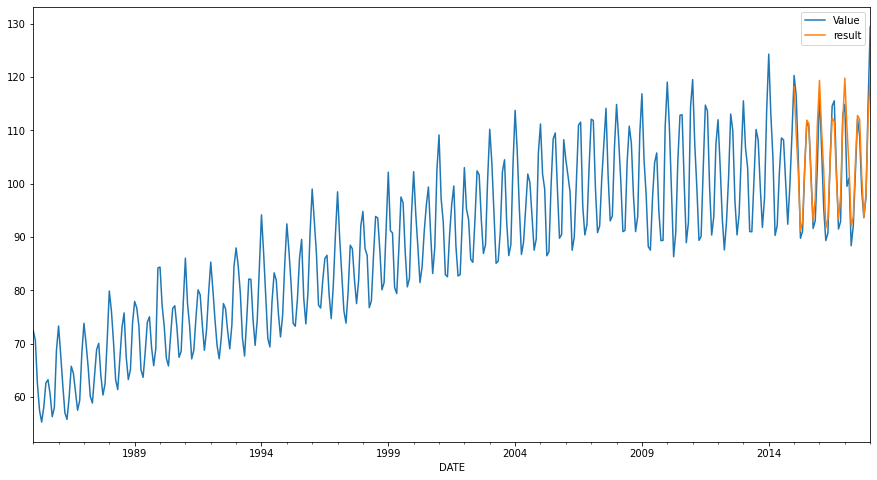

In [33]:
df[['Value','result']].plot(figsize = (15, 8))

In [35]:
model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1), seasonal_order =  (1, 0, 1, 12), initialization='approximate_diffuse')
fit_model = model.fit()
df['result'] = fit_model.predict(start = 360, end = 397, dynamic = True)

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
print( fit_model.summary() )

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -997.723
Date:                            Mon, 29 Nov 2021   AIC                           2005.446
Time:                                    22:58:21   BIC                           2025.365
Sample:                                01-01-1985   HQIC                          2013.337
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5203      0.047     10.969      0.000       0.427       0.613
ma.L1         -0.9534      0.020   

<AxesSubplot:xlabel='DATE'>

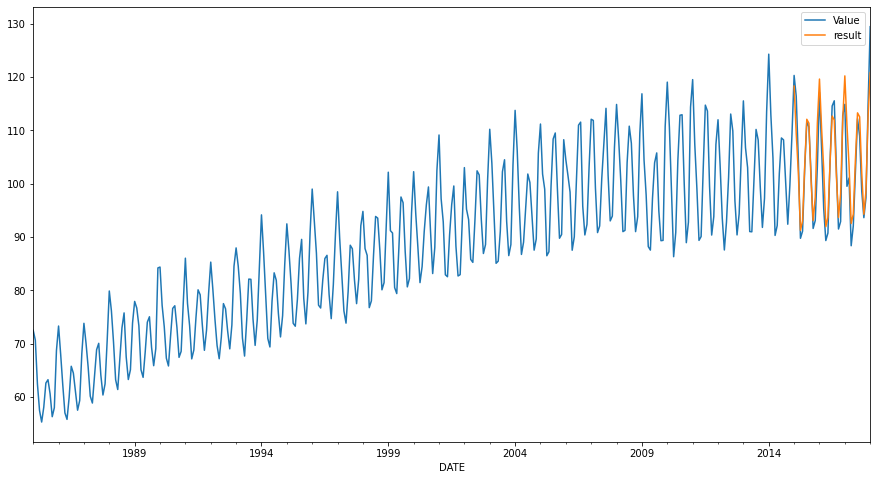

In [37]:
df[['Value','result']].plot(figsize = (15, 8))

In [39]:
model = sm.tsa.statespace.SARIMAX(df, order = (2, 1, 1), seasonal_order =  (1, 0, 1, 12), initialization='approximate_diffuse')
fit_model = model.fit()
df['result'] = fit_model.predict(start = 360, end = 397, dynamic = True)
print( fit_model.summary() )

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -997.390
Date:                            Mon, 29 Nov 2021   AIC                           2006.780
Time:                                    22:58:31   BIC                           2030.683
Sample:                                01-01-1985   HQIC                          2016.249
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5191      0.048     10.887      0.000       0.426       0.613
ar.L2         -0.0061      0.017   

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<AxesSubplot:xlabel='DATE'>

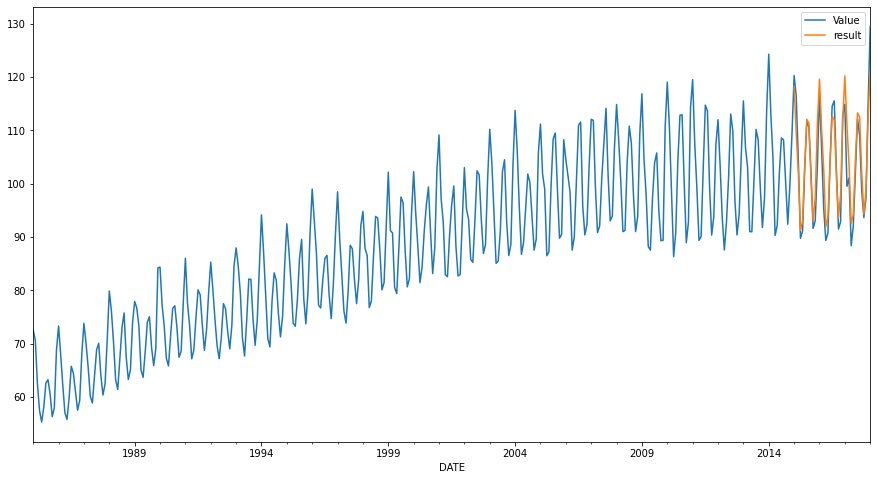

In [40]:
df[['Value','result']].plot(figsize = (15, 8))

Ljung-Box 테스트는 fitting 이후의 잔차가 래그에 따라 correlated 되어 있는지 판단하는 것으로 잔차가 white noise를 따르는지 판단하는 테스트입니다. 따라서 Ljung-Box 테스트의 귀무 가설은 잔차가 white noise를 따른다 이고 p-value가 낮으면 귀무 가설을 기각하여 white noise를 따르지 않아 각 시간대 별 잔차가 correlated 되어있다고 판단할 수 있습니다.

Jarque-Bera 테스트는 잔차의 분포가 normal distribution을 따르는지에 대한 테스트로 normal distribution은 skewness가 0, kurtosis가 3인 것을 이용합니다. 이 테스트 또한 귀무 가설은 잔차가 normal distribution을 따른다 이고 p-value가 낮으면 귀무 가설을 기각합니다.

Heteroskedasticity는 각 시간대 별 잔차의 분산이 일정한지 (homoscedastic) 에 대한 테스트입니다. 이 테스트의 귀무 가설은 잔차의 분산이 일정하다 (homoscedastic)이고 p-value가 낮으면 귀무 가설을 기각합니다.

- 이를 종합해서 볼 때, fitting 모델의 결과의 p-value는 모든 테스트에 대해 0.05 이상을 가지므로 fitting이 잘 되었을 때의 잔차의 검정 테스트를 모두 잘 통과했음을 알 수 있습니다. plot_diagnostic을 이용하면 그림으로 확인할 수 있습니다.

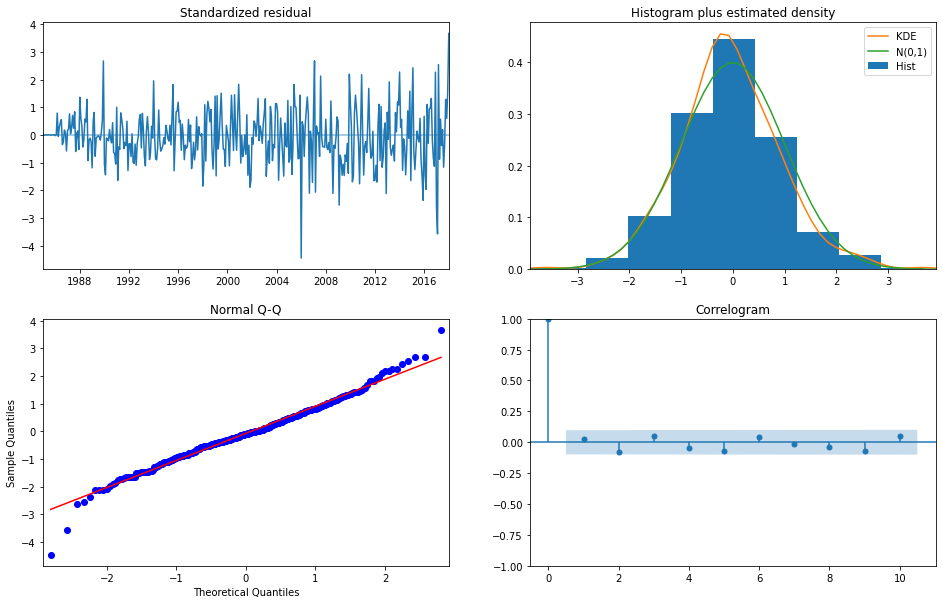

In [45]:
fit_model.plot_diagnostics(figsize = (16, 10))
plt.show()